# Classic MNIST notebook

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import streamlit as st
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import struct
from array import array
from os.path  import join

## Data pre-processing

In [22]:
# MNIST Data Loader Class
class MnistDataloader(object):
    def __init__(self, 
                training_images_filepath,
                training_labels_filepath,
                test_images_filepath, 
                test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)

          # Convert data to NumPy arrays
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)
        
        return (x_train, y_train),(x_test, y_test)        

Helper functions to manage model building, training and training analysis

In [3]:
def compile_model():
    # Setting up the convolution neural network with convnet and maxpooling layer
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Model Summary
    print(f'model.summary(): {model.summary()}')

    # Adding the fully connected layers to CNN
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Printing model summary
    print(f'model.summary(): {model.summary()}')

    # Configuring the network
    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return model


def train_model(X_train,
                Y_train, 
                model):
    
    history = model.fit(X_train, Y_train,
                        epochs=15,
                        batch_size=512)
    
    return history


def analyse_history(model, history, X_test, Y_test):  

    history_dict = history.history
    loss_values = history_dict['loss']
    accuracy = history_dict['accuracy']
    
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the model accuracy vs Epochs
    ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
    # ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    ax[0].set_title('Training & Validation Accuracy', fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('Accuracy', fontsize=16)
    ax[0].legend()
    
    # Plot the loss vs Epochs
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    # ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
    ax[1].set_title('Training & Validation Loss', fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('Loss', fontsize=16)
    ax[1].legend()
    
    plt.show()

    # Evaluate the model accuracy and loss on the test dataset
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    
    # Print the loss and accuracy
    st.write(f'test_loss: {test_loss}')
    st.write(f'test_acc: {test_acc}')

    return test_loss, test_acc

Ingest data and map labels to categorical data format

In [28]:
# Set file paths based on added MNIST Datasets
input_path = '../MNIST_data/classic'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
images, labels = mnist_dataloader.read_images_labels(training_images_filepath, training_labels_filepath)

In [34]:
print(f'type(labels): {type(labels)}')
print(f'type(labels[0]): {type(labels[0])}')
print(f'labels[0]: {labels[0]}')
print(f'len(labels): {len(labels)}')

type(labels): <class 'array.array'>
type(labels[0]): <class 'int'>
labels[0]: 5
len(labels): 60000


In [35]:
# Set file paths based on added MNIST Datasets
input_path = '../MNIST_data/classic'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
print('initialised class')
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print('loaded data')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('mapped y data to categorical')


initialised class
loaded data
mapped y data to categorical


In [36]:
print(f'size of training set: {len(x_train)}')
print(f'size of test set: {len(x_test)}')

size of training set: 60000
size of test set: 10000


In [5]:
model = compile_model()
print('compiled model')

history = train_model(x_train,
                y_train, 
                model)
print('train model')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

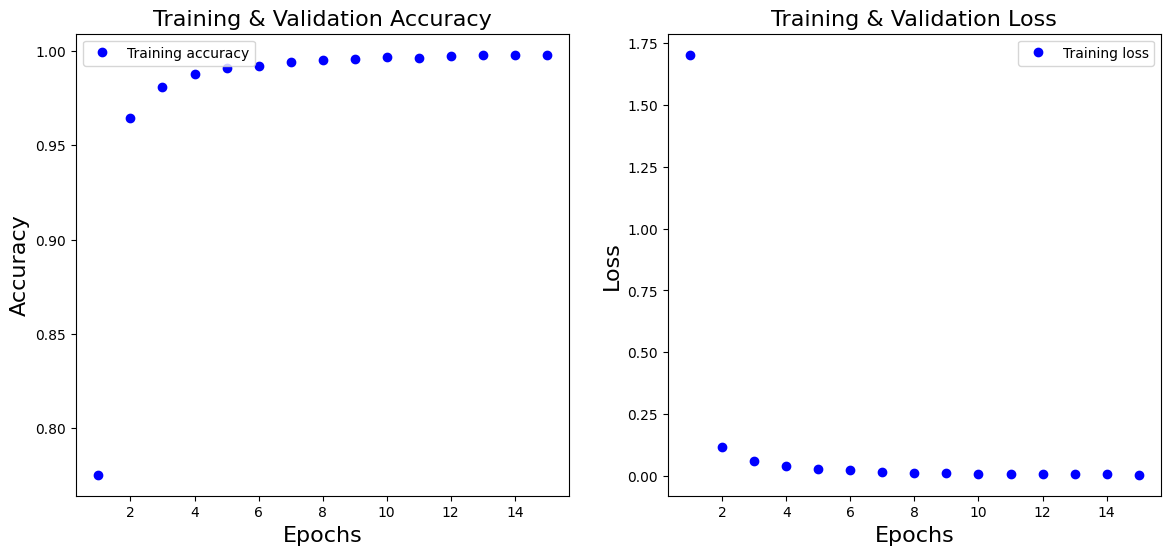

313/313 [==============================] - 3s 9ms/step - loss: 0.0578 - accuracy: 0.9906


2023-09-01 14:47:06.280 
  command:

    streamlit run C:\Users\ShaneShort\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


analyse training


In [6]:
test_loss, test_acc = analyse_history(model, history, x_test, y_test)
print('analyse training')

Testing model against individual images

1/1 [==============================] - 0s 207ms/step
Prediction: 8
True Label: 8


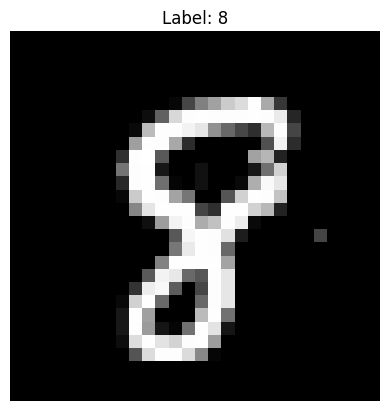

In [7]:
import matplotlib.pyplot as plt
import random

def _test_single(X_test, Y_test, image_index):
    image = X_test[image_index]  # Get the corresponding image data from X_test
    label = Y_test[image_index]  # Get the corresponding label data from y_test

    image = image.reshape(28, 28)  # Reshape the image array from (28, 28, 1) to (28, 28)

    plt.imshow(image, cmap='gray')  # Display the image using grayscale color map
    plt.title(f"Label: {np.argmax(label)}")  # Set the title of the plot with the true label
    plt.axis('off')  # Remove the axis labels

    return plt.gcf()  # Return the current figure for later plotting

image_index = random.randint(0, len(x_test)-1)  # Generate a random index within the range of the test set
label = y_test[image_index]  # Get the corresponding label data from y_test
prediction = model.predict(np.expand_dims(x_test[image_index], axis=0))
predicted_label = np.argmax(prediction)

print("Prediction:", predicted_label)
print("True Label:", np.argmax(label))

figure = _test_single(x_test, y_test, image_index)
plt.show()  # Show the plot


In [17]:
import tkinter as tk
from PIL import Image, ImageDraw
import io

In [18]:

window = tk.Tk()
canvas = tk.Canvas(window, width=280, height=280, bg='white')
canvas.pack()

In [19]:
def on_mouse_drag(event):
    x = event.x
    y = event.y
    radius = 5
    canvas.create_oval(x - radius, y - radius, x + radius, y + radius, fill='black')

canvas.bind('<B1-Motion>', on_mouse_drag)
def clear_canvas():
    canvas.delete('all')

def run_model_prediction():
    image = canvas.postscript(colormode='gray')
    img = Image.open(io.BytesIO(image.encode('utf-8')))
    img = img.resize((28, 28))
    # Process the image and feed it into your model for prediction
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(prediction)

    print("Prediction:", predicted_label)


In [20]:
clear_button = tk.Button(window, text='Clear', command=clear_canvas)
clear_button.pack()

predict_button = tk.Button(window, text='Predict', command=run_model_prediction)
predict_button.pack()

window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ShaneShort\AppData\Local\Temp\ipykernel_9444\1246062621.py", line 14, in run_model_prediction
    img = img.resize((28, 28))
          ^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\PIL\Image.py", line 2157, in resize
    self.load()
  File "c:\Python311\Lib\site-packages\PIL\EpsImagePlugin.py", line 387, in load
    self.im = Ghostscript(self.tile, self.size, self.fp, scale, transparency)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\PIL\EpsImagePlugin.py", line 138, in Ghostscript
    raise OSError(msg)
OSError: Unable to locate Ghostscript on paths
